# Data Understanding Profiling

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv("dataset/user_profiles.csv", index_col=0)

In [3]:
users.shape

(11508, 19)

In [4]:
users.head(10)

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,retweet_count_entropy
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.000000,0.000000,0.0,0.037879,0.190903,1.609438,0.037879,0.190903,1.609438
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.000000,0.000000,0.0,0.049587,0.217090,1.791759,0.024793,0.155495,1.098612
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,19.250000,5.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.000000,0.000000,0.0,0.165387,0.530838,5.105129,0.826239,13.034008,2.170410
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.000000,0.000000,0.0,0.056365,0.243387,5.248623,0.016772,0.142619,3.965939
2199062688,Qq,en,0,2018-11-19 06:58:18,8,45.132176,9.732754,0.022672,0.926676,0.024120,0.000000,0.000000,0.0,0.685480,2.111569,5.773195,15.277376,50.170955,5.692726
1174869769,Tania Wren,en,1,2018-02-15 10:51:28,21,64.041667,13.666667,0.125000,0.125000,0.458333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3118659848,charlotte gray,en,0,2020-03-31 21:19:59,4,62.362963,12.807407,0.088889,0.807407,0.111111,0.000000,0.000000,0.0,0.918519,1.813741,3.603718,4.370370,22.814791,1.735419
616225564,Anisha Williams,en,0,2017-06-25 15:49:36,7,66.850000,14.950000,0.033333,0.016667,0.233333,0.016667,0.128019,0.0,0.050000,0.284312,0.636514,0.016667,0.128019,0.000000
2357425536,Meda Tatlock,en,1,2019-02-25 04:30:56,69,65.074324,14.398649,0.000000,0.344595,0.101351,0.000000,0.000000,0.0,0.033784,0.180672,1.609438,0.040541,0.197223,1.791759


In [5]:
users.info

<bound method DataFrame.info of                           name lang  bot           created_at  statuses_count  \
2353593986     Lamonica Raborn   en    1  2019-02-22 18:00:42              76   
2358850842       Lourie Botton   en    0  2019-02-26 03:02:32               4   
137959629     Dadan Syarifudin   en    1  2015-04-30 07:09:56               7   
466124818       Carletto Focia   it    1  2017-01-18 02:49:18              50   
2571493866           MBK Ebook   en    0  2019-06-18 19:30:21               8   
...                        ...  ...  ...                  ...             ...   
2911861962  Madrid Lae Maika .   en    0  2019-11-29 13:16:02               7   
1378532629           Clau Sato   en    0  2018-04-27 03:01:58               8   
126984069   ALMA LETICIA NUÑO    es    0  2015-03-29 17:01:24               1   
2383025796     Minnie Guadagno   en    1  2019-03-13 02:44:13              42   
933183398            Corvanna    en    0  2017-11-09 23:24:16               8

## avg_length

In [6]:
users.avg_length.value_counts()

60.000000    13
57.000000     9
50.000000     9
64.000000     8
71.000000     8
             ..
67.948148     1
70.032680     1
62.942529     1
99.298701     1
52.068064     1
Name: avg_length, Length: 10794, dtype: int64

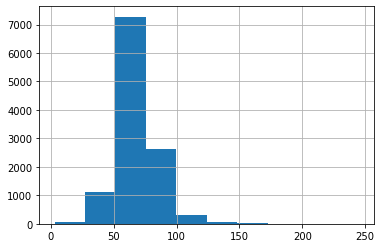

In [7]:
users.avg_length.hist()
plt.show()

In [8]:
users.avg_length.describe()

count    11508.000000
mean        68.140132
std         16.206471
min          3.000000
25%         59.398274
50%         65.527658
75%         77.422770
max        245.000000
Name: avg_length, dtype: float64

In [9]:
users.avg_length.median()

65.52765789965359

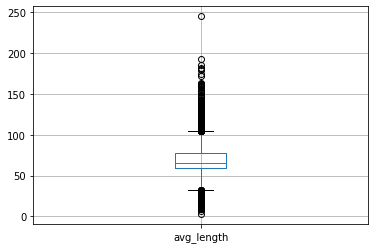

In [10]:
pd.DataFrame(users.avg_length).boxplot()
plt.show()

<AxesSubplot:>

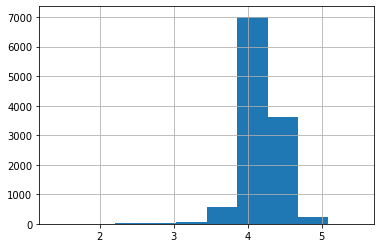

In [11]:
log_feature = pd.Series(np.log(users.avg_length + 1))
log_feature.hist()

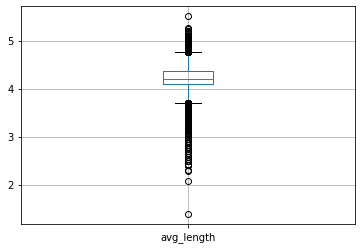

In [12]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## avg_special_chars

In [13]:
users.avg_special_chars.value_counts()

13.000000    34
14.000000    30
15.000000    23
12.000000    19
14.666667    19
             ..
18.503876     1
12.524872     1
16.116667     1
17.209358     1
11.291587     1
Name: avg_special_chars, Length: 9943, dtype: int64

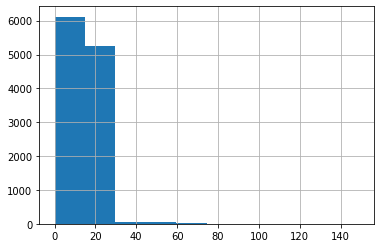

In [14]:
users.avg_special_chars.hist()
plt.show()

In [15]:
users.avg_special_chars.describe() 

count    11508.000000
mean        15.481021
std          5.457811
min          0.000000
25%         13.181641
50%         14.694363
75%         17.228965
max        149.000000
Name: avg_special_chars, dtype: float64

In [16]:
users.avg_special_chars.median()

14.69436341242059

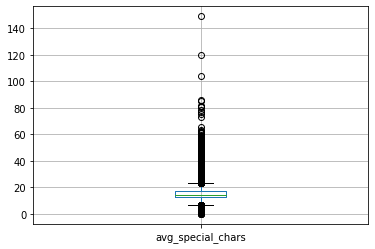

In [17]:
pd.DataFrame(users.avg_special_chars).boxplot()
plt.show()

<AxesSubplot:>

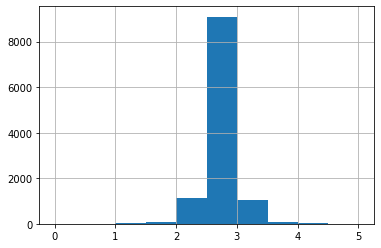

In [18]:
log_feature = pd.Series(np.log(users.avg_special_chars + 1))
log_feature.hist()

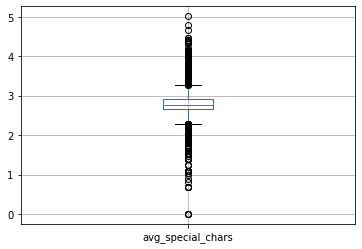

In [19]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## urls_ratio

In [20]:
users.urls_ratio.value_counts()

0.000000    5104
1.000000      67
0.050000      31
0.040000      29
0.047619      29
            ... 
0.006751       1
0.724675       1
0.020518       1
0.661855       1
0.011707       1
Name: urls_ratio, Length: 5028, dtype: int64

In [21]:
users.urls_ratio.describe()

count    11508.000000
mean         0.085288
std          0.178616
min          0.000000
25%          0.000000
50%          0.016129
75%          0.070043
max          2.000000
Name: urls_ratio, dtype: float64

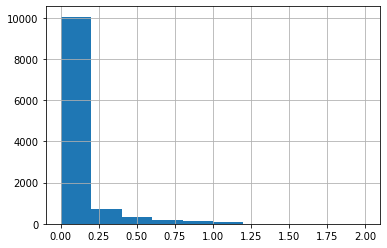

In [22]:
users.urls_ratio.hist()
plt.show()

In [23]:
users.urls_ratio.median()

0.0161290322580645

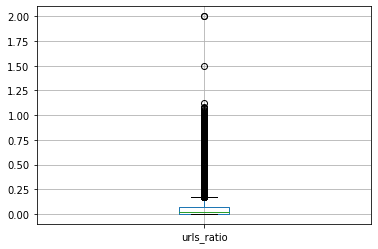

In [24]:
pd.DataFrame(users.urls_ratio).boxplot()
plt.show()

<AxesSubplot:>

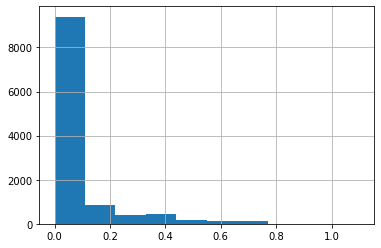

In [25]:
log_feature = pd.Series(np.log(users.urls_ratio + 1))
log_feature.hist()

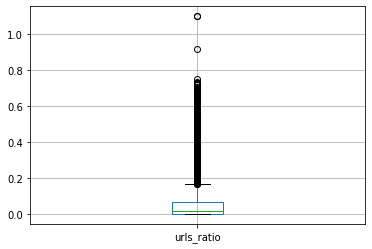

In [26]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## mentions_ratio

In [27]:
users.mentions_ratio.value_counts()

0.000000    2093
0.333333     110
1.000000      48
0.285714      34
0.300000      32
            ... 
1.298795       1
0.401198       1
1.076923       1
0.378151       1
0.785189       1
Name: mentions_ratio, Length: 5968, dtype: int64

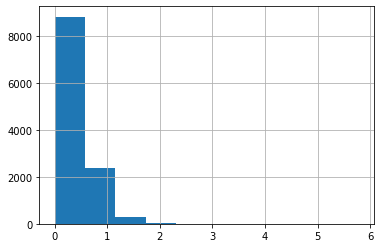

In [28]:
users.mentions_ratio.hist()
plt.show()

In [29]:
users.mentions_ratio.describe()

count    11508.000000
mean         0.353250
std          0.361928
min          0.000000
25%          0.010260
50%          0.304348
75%          0.504230
max          5.785124
Name: mentions_ratio, dtype: float64

In [30]:
users.mentions_ratio.median()

0.3043478260869565

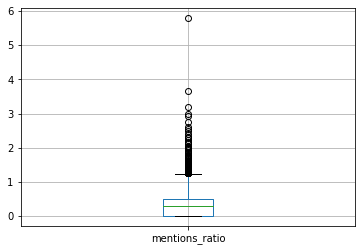

In [31]:
pd.DataFrame(users.mentions_ratio).boxplot()
plt.show()

<AxesSubplot:>

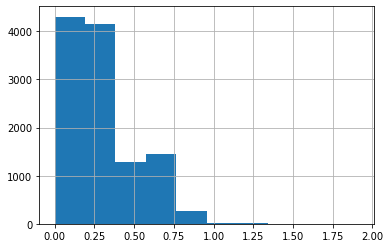

In [32]:
log_feature = pd.Series(np.log(users.mentions_ratio + 1))
log_feature.hist()

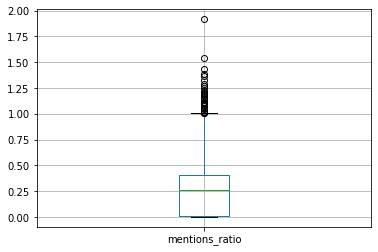

In [33]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## hashtags_ratio

In [34]:
users.hashtags_ratio.value_counts()

0.000000    1054
0.125000      63
0.090909      57
0.076923      56
0.200000      54
            ... 
0.027190       1
0.070455       1
0.244161       1
0.054230       1
0.041111       1
Name: hashtags_ratio, Length: 5562, dtype: int64

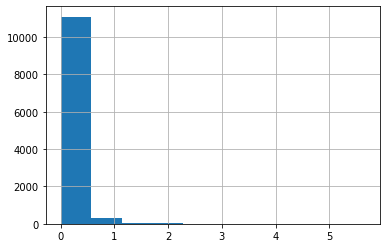

In [35]:
users.hashtags_ratio.hist()
plt.show()

In [36]:
users.hashtags_ratio.describe()

count    11508.000000
mean         0.140665
std          0.212670
min          0.000000
25%          0.045455
50%          0.076923
75%          0.153658
max          5.669974
Name: hashtags_ratio, dtype: float64

In [37]:
users.hashtags_ratio.median()

0.0769230769230769

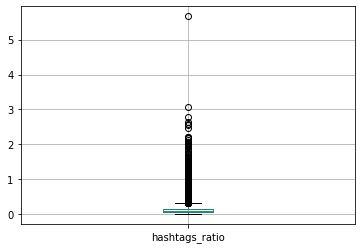

In [38]:
pd.DataFrame(users.hashtags_ratio).boxplot()
plt.show()

<AxesSubplot:>

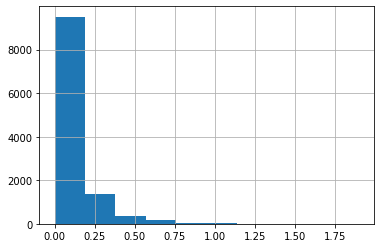

In [39]:
log_feature = pd.Series(np.log(users.hashtags_ratio + 1))
log_feature.hist()

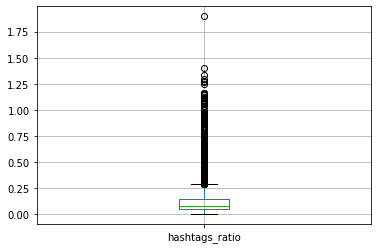

In [40]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## reply_count_mean

In [41]:
users.reply_count_mean.value_counts()

0.000000    9617
0.047619      51
0.045455      42
0.038462      41
0.043478      40
            ... 
0.207143       1
0.592834       1
0.015812       1
1.695652       1
0.402757       1
Name: reply_count_mean, Length: 595, dtype: int64

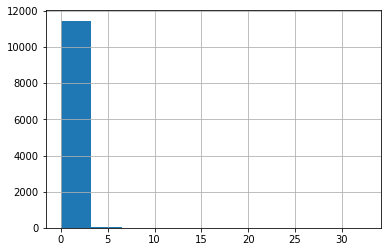

In [42]:
users.reply_count_mean.hist()
plt.show()

In [43]:
users.reply_count_mean.describe()

count    11508.000000
mean         0.056410
std          0.658114
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         32.500000
Name: reply_count_mean, dtype: float64

In [44]:
users.reply_count_mean.median()

0.0

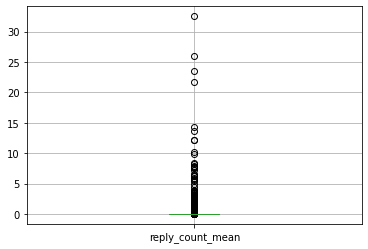

In [45]:
pd.DataFrame(users.reply_count_mean).boxplot()
plt.show()

<AxesSubplot:>

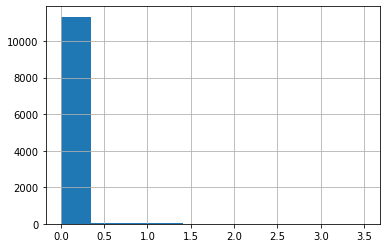

In [46]:
log_feature = pd.Series(np.log(users.reply_count_mean + 1))
log_feature.hist()

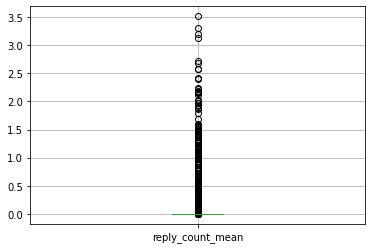

In [47]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## reply_count_std

In [48]:
users.reply_count_std.value_counts()

0.000000    9623
0.192308      41
0.203931      38
0.217945      38
0.195959      38
            ... 
0.126474       1
1.538851       1
0.354043       1
0.456813       1
4.240669       1
Name: reply_count_std, Length: 807, dtype: int64

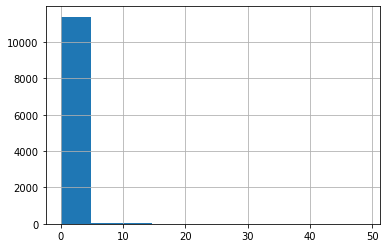

In [49]:
users.reply_count_std.hist()
plt.show()

In [50]:
users.reply_count_std.describe()

count    11508.000000
mean         0.167430
std          1.273833
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         48.877909
Name: reply_count_std, dtype: float64

In [51]:
users.reply_count_std.median()

0.0

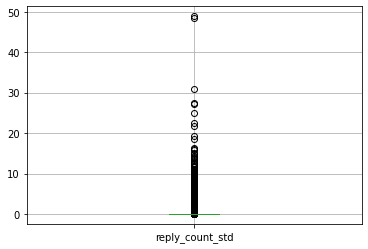

In [52]:
pd.DataFrame(users.reply_count_std).boxplot()
plt.show()

<AxesSubplot:>

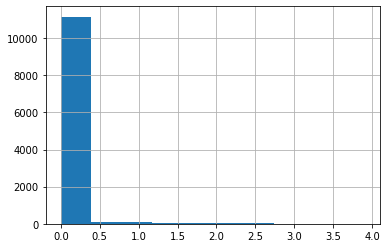

In [53]:
log_feature = pd.Series(np.log(users.reply_count_std + 1))
log_feature.hist()

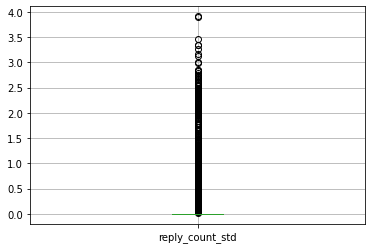

In [54]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## reply_count_entropy

In [55]:
users.reply_count_entropy.value_counts()

0.000000    10518
0.693147      313
1.098612      132
1.386294       64
0.636514       51
            ...  
2.826115        1
2.403640        1
1.724507        1
3.192446        1
2.882973        1
Name: reply_count_entropy, Length: 275, dtype: int64

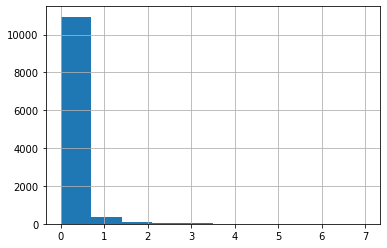

In [56]:
users.reply_count_entropy.hist()
plt.show()

In [57]:
users.reply_count_entropy.describe()

count    11508.000000
mean         0.107280
std          0.437746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.003780
Name: reply_count_entropy, dtype: float64

In [58]:
users.reply_count_entropy.median()

0.0

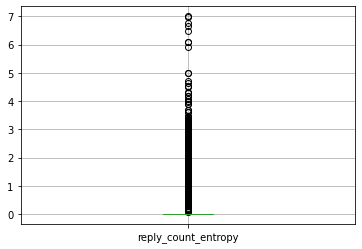

In [59]:
pd.DataFrame(users.reply_count_entropy).boxplot()
plt.show()

<AxesSubplot:>

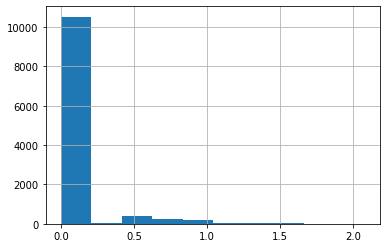

In [60]:
log_feature = pd.Series(np.log(users.reply_count_entropy + 1))
log_feature.hist()

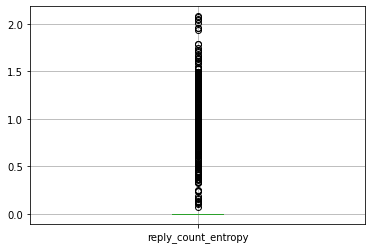

In [61]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## favorite_count_mean

In [62]:
users.favorite_count_mean.value_counts()

0.000000    1996
0.037037      49
0.055556      48
0.052632      47
0.050000      46
            ... 
0.190476       1
0.404392       1
0.005844       1
0.188445       1
0.118160       1
Name: favorite_count_mean, Length: 5758, dtype: int64

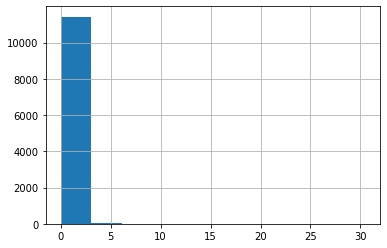

In [63]:
users.favorite_count_mean.hist()
plt.show()

In [64]:
users.favorite_count_mean.describe()

count    11508.000000
mean         0.239172
std          0.792009
min          0.000000
25%          0.017738
50%          0.052632
75%          0.179675
max         30.476554
Name: favorite_count_mean, dtype: float64

In [65]:
users.favorite_count_mean.median()

0.0526315789473684

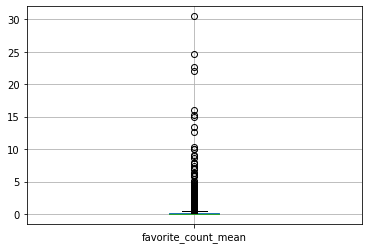

In [66]:
pd.DataFrame(users.favorite_count_mean).boxplot()
plt.show()

<AxesSubplot:>

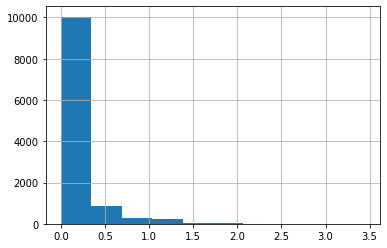

In [67]:
log_feature = pd.Series(np.log(users.favorite_count_mean + 1))
log_feature.hist()

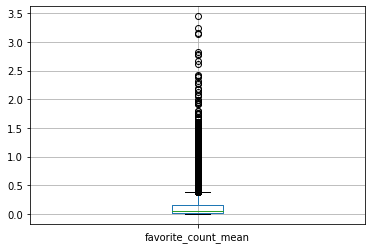

In [68]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## favorite_count_std

In [69]:
users.favorite_count_std.value_counts()

0.000000    2006
0.188853      44
0.173993      39
0.203931      37
0.192308      37
            ... 
0.269486       1
0.180956       1
0.389856       1
1.309470       1
0.381551       1
Name: favorite_count_std, Length: 6771, dtype: int64

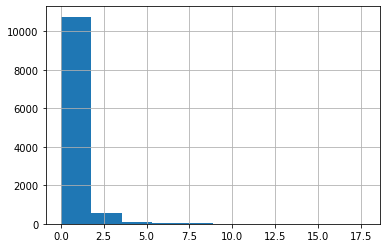

In [70]:
users.favorite_count_std.hist()
plt.show()

In [71]:
users.favorite_count_std.describe()

count    11508.000000
mean         0.537340
std          0.960470
min          0.000000
25%          0.136692
50%          0.240315
75%          0.565676
max         17.745109
Name: favorite_count_std, dtype: float64

In [72]:
users.favorite_count_std.median()

0.2403153746432816

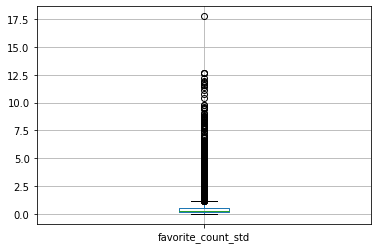

In [73]:
pd.DataFrame(users.favorite_count_std).boxplot()
plt.show()

<AxesSubplot:>

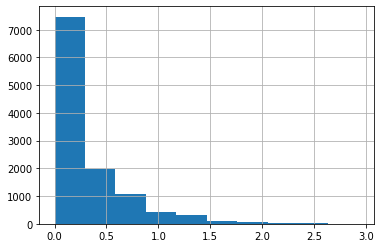

In [74]:
log_feature = pd.Series(np.log(users.favorite_count_std + 1))
log_feature.hist()

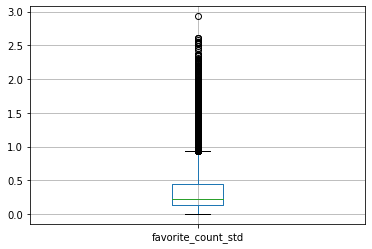

In [75]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## favorite_count_entropy

In [76]:
users.favorite_count_entropy.value_counts()

0.000000    2838
1.609438     463
1.386294     408
1.791759     375
1.098612     350
            ... 
5.498410       1
3.390773       1
4.082587       1
5.562176       1
5.852158       1
Name: favorite_count_entropy, Length: 4665, dtype: int64

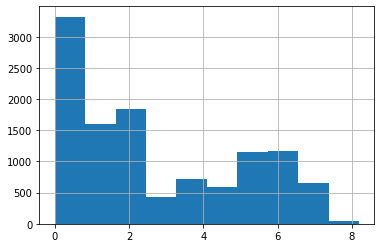

In [77]:
users.favorite_count_entropy.hist()
plt.show()

In [78]:
users.favorite_count_entropy.describe()

count    11508.000000
mean         2.681342
std          2.354728
min          0.000000
25%          0.450561
50%          1.945910
75%          5.066375
max          8.191328
Name: favorite_count_entropy, dtype: float64

In [79]:
users.favorite_count_entropy.median()

1.9459101490553128

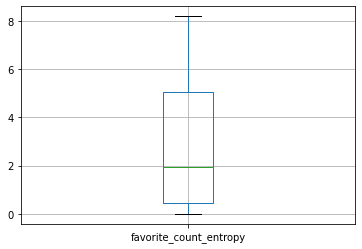

In [80]:
pd.DataFrame(users.favorite_count_entropy).boxplot()
plt.show()

<AxesSubplot:>

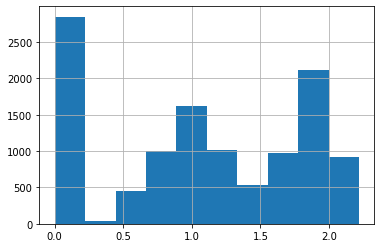

In [81]:
log_feature = pd.Series(np.log(users.favorite_count_entropy + 1))
log_feature.hist()

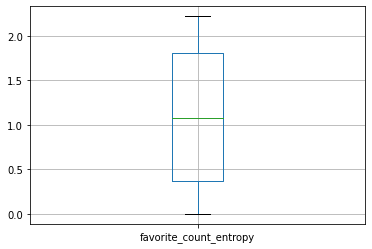

In [82]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## retweet_count_mean

In [83]:
users.retweet_count_mean.value_counts()

0.000000     2340
0.040000       41
0.027778       36
0.043478       36
0.050000       34
             ... 
1.079457        1
19.585495       1
0.005356        1
12.151222       1
14.494419       1
Name: retweet_count_mean, Length: 5946, dtype: int64

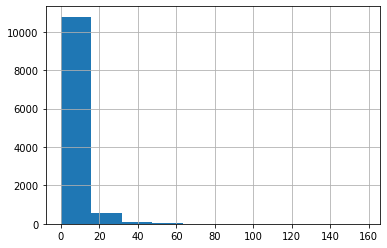

In [84]:
users.retweet_count_mean.hist()
plt.show()

In [85]:
users.retweet_count_mean.describe()

count    11508.000000
mean         3.488927
std          8.405731
min          0.000000
25%          0.010309
50%          0.053571
75%          3.025329
max        158.222989
Name: retweet_count_mean, dtype: float64

In [86]:
users.retweet_count_mean.median()

0.0535714285714285

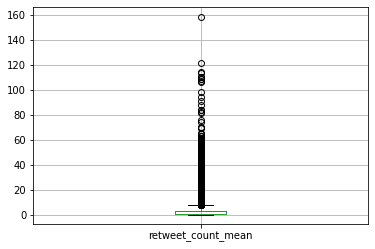

In [87]:
pd.DataFrame(users.retweet_count_mean).boxplot()
plt.show()

<AxesSubplot:>

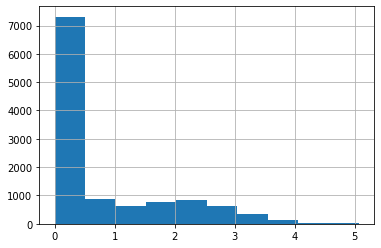

In [88]:
log_feature = pd.Series(np.log(users.retweet_count_mean + 1))
log_feature.hist()

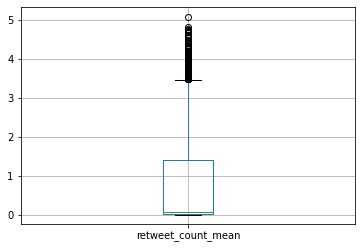

In [89]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## retweet_count_std

In [90]:
users.retweet_count_std.value_counts()

0.000000     2345
0.195959       35
0.203931       32
0.199826       31
0.173993       30
             ... 
90.979187       1
12.470452       1
34.184649       1
46.966144       1
50.770315       1
Name: retweet_count_std, Length: 6599, dtype: int64

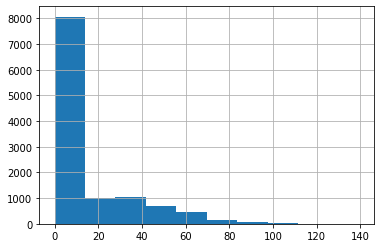

In [91]:
users.retweet_count_std.hist()
plt.show()

In [92]:
users.retweet_count_std.describe()

count    11508.000000
mean        12.757379
std         20.513190
min          0.000000
25%          0.103689
50%          0.237902
75%         21.767025
max        139.322048
Name: retweet_count_std, dtype: float64

In [93]:
users.retweet_count_std.median()

0.2379017070603366

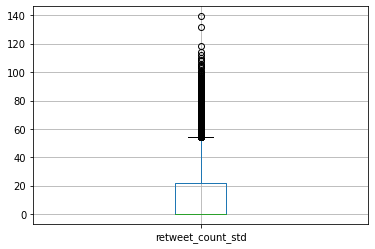

In [94]:
pd.DataFrame(users.retweet_count_std).boxplot()
plt.show()

<AxesSubplot:>

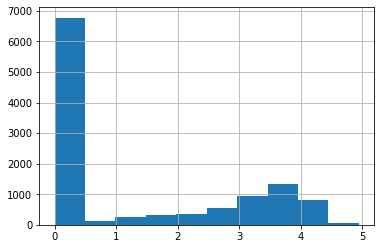

In [95]:
log_feature = pd.Series(np.log(users.retweet_count_std + 1))
log_feature.hist()

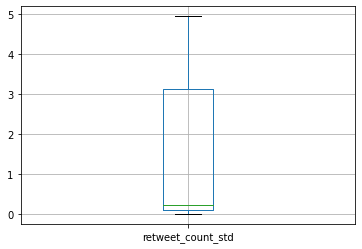

In [96]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## reply_count_mean

In [97]:
users.reply_count_mean.value_counts()

0.000000    9617
0.047619      51
0.045455      42
0.038462      41
0.043478      40
            ... 
0.207143       1
0.592834       1
0.015812       1
1.695652       1
0.402757       1
Name: reply_count_mean, Length: 595, dtype: int64

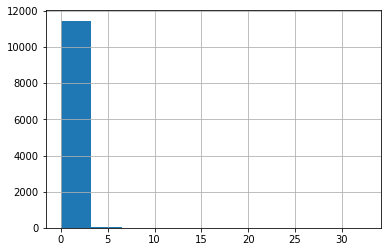

In [98]:
users.reply_count_mean.hist()
plt.show()

In [99]:
users.reply_count_mean.describe()

count    11508.000000
mean         0.056410
std          0.658114
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         32.500000
Name: reply_count_mean, dtype: float64

In [100]:
users.reply_count_mean.median()

0.0

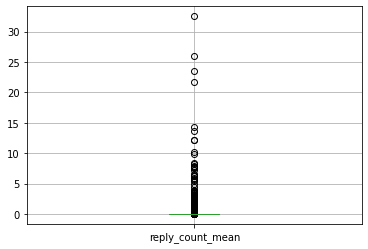

In [101]:
pd.DataFrame(users.reply_count_mean).boxplot()
plt.show()

<AxesSubplot:>

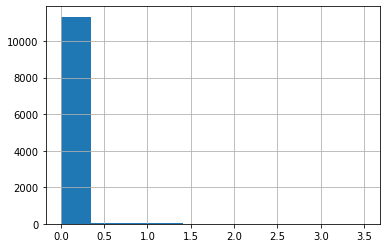

In [102]:
log_feature = pd.Series(np.log(users.reply_count_mean + 1))
log_feature.hist()

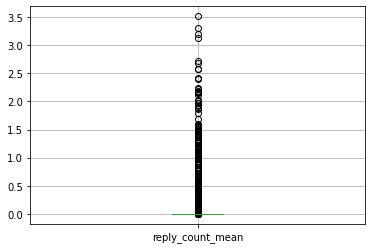

In [103]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## retweet_count_entropy

In [104]:
users.retweet_count_entropy.value_counts()

0.000000    3143
0.693147     489
1.386294     442
1.098612     441
1.609438     377
            ... 
5.522771       1
2.081676       1
5.970095       1
7.413351       1
6.003333       1
Name: retweet_count_entropy, Length: 4999, dtype: int64

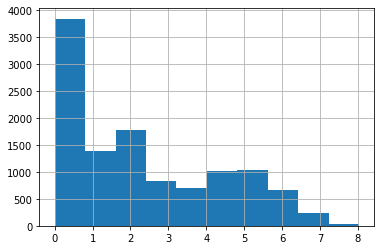

In [105]:
users.retweet_count_entropy.hist()
plt.show()

In [106]:
users.retweet_count_entropy.describe()

count    11508.000000
mean         2.258023
std          2.077753
min          0.000000
25%          0.000000
50%          1.747868
75%          4.103871
max          8.027767
Name: retweet_count_entropy, dtype: float64

In [107]:
users.retweet_count_entropy.median()

1.7478680974667575

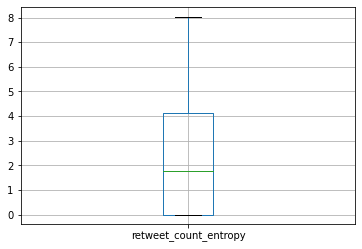

In [108]:
pd.DataFrame(users.retweet_count_entropy).boxplot()
plt.show()

<AxesSubplot:>

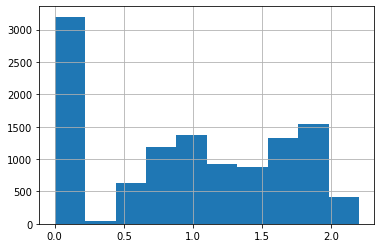

In [109]:
log_feature = pd.Series(np.log(users.retweet_count_entropy + 1))
log_feature.hist()

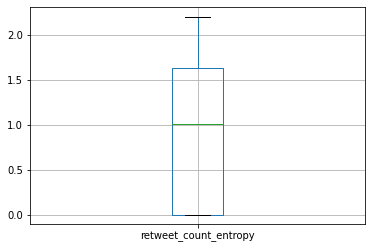

In [110]:
pd.DataFrame(log_feature).boxplot()
plt.show()